In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
boston = load_boston()
columns = boston.feature_names
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


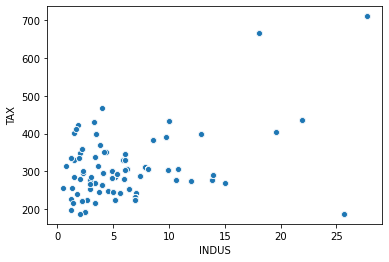

In [6]:
sns.scatterplot(boston_df['INDUS'], boston_df['TAX'])

# IQR

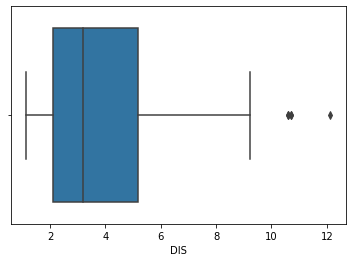

In [7]:
sns.boxplot(x=boston_df['DIS'])

In [8]:
data = boston_df['RM']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

print('Total observations: %d' % len(data))

Percentiles: 25th=5.886, 75th=6.623, IQR=0.738
Identified outliers: 30
Total observations: 506


# Standard Deviation / z-score

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

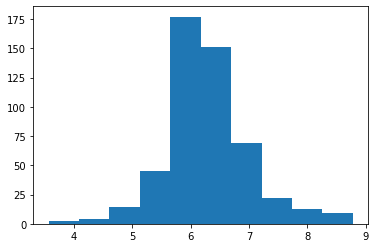

In [9]:
plt.hist(boston_df['RM'])

In [17]:
z = np.abs(stats.zscore(boston_df['RM']))
threshold = 3
outliers = list(np.where(z > threshold)[0])
print('Number of Outliers:', len(outliers))

Number of Outliers: 8


In [11]:
boston_df.iloc[225]['RM']

8.725

In [12]:
boston_df.RM.max()

8.78

# Outlier Removal

In [18]:
outliers

[225, 257, 262, 364, 365, 367, 374, 406]

In [19]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
# removing rows
boston_df.drop(outliers, axis= 'index')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [25]:
#imputation
mean = boston_df.RM.mean()
median = boston_df.RM.median()
mode = boston_df.RM.mode()[5]

print('Mean:', mean, '\nMedian: ', median, '\nMode: ', mode)

Mean: 6.284634387351787 
Median:  6.2085 
Mode:  6.417


In [30]:
for i in outliers:
    boston_df.iloc[i]['RM'] = mode

In [31]:
boston_df.iloc[outliers]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
225,0.52693,0.0,6.20,0.0,0.504,6.417,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
257,0.61154,20.0,3.97,0.0,0.647,6.417,86.9,1.8010,5.0,264.0,13.0,389.70,5.12
262,0.52014,20.0,3.97,0.0,0.647,6.417,91.5,2.2885,5.0,264.0,13.0,386.86,5.91
364,3.47428,0.0,18.10,1.0,0.718,6.417,82.9,1.9047,24.0,666.0,20.2,354.55,5.29
365,4.55587,0.0,18.10,0.0,0.718,6.417,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
367,13.52220,0.0,18.10,0.0,0.631,6.417,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
374,18.49820,0.0,18.10,0.0,0.668,6.417,100.0,1.1370,24.0,666.0,20.2,396.90,37.97
406,20.71620,0.0,18.10,0.0,0.659,6.417,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
